In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from yellowbrick.contrib.classifier import DecisionViz
from sklearn.decomposition import PCA
from itertools import product
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA as PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve , plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_train=pd.read_csv("../Dataset_prepared/Prepared_train.csv")
df_test=pd.read_csv("../Dataset_prepared/Prepared_test.csv")

In [4]:
df_train.drop('actor',axis=1,inplace=True)
df_train.drop('filename',axis=1,inplace=True)

df_test.drop('actor',axis=1,inplace=True)
df_test.drop('filename',axis=1,inplace=True)

In [5]:
c = df_train.select_dtypes(include=['object']).columns.tolist()

c

['vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'sex']

In [6]:
a =[x for x in c if x!='emotion']
a

['vocal_channel', 'emotional_intensity', 'statement', 'repetition', 'sex']

In [7]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
c = df_train.select_dtypes(include=['object']).columns.tolist()
for i in a:
    df_train[i]=le.fit_transform(df_train[i])

for i in a:
    df_test[i]=le.fit_transform(df_test[i])
df_train['emotion']=le.fit_transform(df_train['emotion'])
df_test['emotion']=le.fit_transform(df_test['emotion'])    

In [8]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler, OneHotEncoder

scaler = StandardScaler()
numeric_features = [n for n in df_train.columns if n!="emotion" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and n!="filename" and n!="actor"]
scaled_features = scaler.fit_transform(df_train[numeric_features])
df_train[numeric_features] = scaled_features


scaled_features_test = scaler.transform(df_test[numeric_features])
df_test[numeric_features] = scaled_features_test



In [9]:
col=[x for x in df_train.columns if x!="emotion"]
X_train=df_train[col].values
y_train = np.array(df_train["emotion"])

In [10]:
X_test=df_test[col].values
y_test = np.array(df_test["emotion"])

In [11]:
def print_confMatrix(y_test,y_test_pred):
    cm=confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels =le.classes_)
    fig, ax = plt.subplots(figsize=(10,10))
    disp.plot(ax=ax, xticks_rotation='vertical',cmap='Greens')
    plt.show()

In [12]:
def print_rocCurve(clf,X_test,y_test):
    y_tmp=clf.predict_proba(X_test)
    plot_roc(y_test, clf.predict_proba(X_test),figsize=(10,6))
    plt.show()

BAGGING

In [13]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [14]:
clf_SVC = BaggingClassifier(base_estimator=SVC(C = 0.1  , kernel = 'linear', tol = 1.0,decision_function_shape='ovo')
,  random_state=0)

clf_SVC.fit(X_train, y_train)

y_pred = clf_SVC.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.46794871794871795
F1-score [0.59919028 0.54545455 0.44247788 0.45882353 0.37362637 0.47826087
 0.25373134 0.4556962 ]
              precision    recall  f1-score   support

           0       0.49      0.77      0.60        96
           1       0.47      0.66      0.55        96
           2       0.38      0.52      0.44        48
           3       0.53      0.41      0.46        96
           4       0.40      0.35      0.37        96
           5       0.50      0.46      0.48        48
           6       0.45      0.18      0.25        96
           7       0.58      0.38      0.46        48

    accuracy                           0.47       624
   macro avg       0.47      0.46      0.45       624
weighted avg       0.47      0.47      0.45       624



In [15]:
clf_reg = BaggingClassifier(base_estimator=LogisticRegression(random_state=42,C=0.1,max_iter =600,solver="newton-cg",multi_class="ovr",tol=1.0)
, random_state=0)#900

clf_reg.fit(X_train, y_train)

y_pred = clf_reg.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5064102564102564
F1-score [0.66666667 0.56880734 0.53448276 0.50306748 0.44444444 0.32183908
 0.30882353 0.53763441]
              precision    recall  f1-score   support

           0       0.58      0.79      0.67        96
           1       0.51      0.65      0.57        96
           2       0.46      0.65      0.53        48
           3       0.61      0.43      0.50        96
           4       0.41      0.48      0.44        96
           5       0.36      0.29      0.32        48
           6       0.53      0.22      0.31        96
           7       0.56      0.52      0.54        48

    accuracy                           0.51       624
   macro avg       0.50      0.50      0.49       624
weighted avg       0.51      0.51      0.49       624



In [16]:
clf_random = BaggingClassifier(base_estimator= RandomForestClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=20,n_estimators=1000)) 

clf_random.fit(X_train, y_train)

y_pred = clf_random.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4150641025641026
F1-score [0.584      0.58039216 0.26470588 0.2962963  0.32038835 0.
 0.26744186 0.47368421]
              precision    recall  f1-score   support

           0       0.47      0.76      0.58        96
           1       0.47      0.77      0.58        96
           2       0.45      0.19      0.26        48
           3       0.51      0.21      0.30        96
           4       0.30      0.34      0.32        96
           5       0.00      0.00      0.00        48
           6       0.30      0.24      0.27        96
           7       0.41      0.56      0.47        48

    accuracy                           0.42       624
   macro avg       0.36      0.38      0.35       624
weighted avg       0.38      0.42      0.37       624



In [17]:
from sklearn.linear_model import Perceptron

clf_perc = BaggingClassifier(base_estimator= Perceptron(alpha=0.0001, penalty='l1', tol= 0.001),random_state=0) 

clf_perc.fit(X_train, y_train)

y_pred = clf_perc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.46634615384615385
F1-score [0.6367713  0.49565217 0.53125    0.50632911 0.35051546 0.27906977
 0.29457364 0.48      ]
              precision    recall  f1-score   support

           0       0.56      0.74      0.64        96
           1       0.43      0.59      0.50        96
           2       0.42      0.71      0.53        48
           3       0.65      0.42      0.51        96
           4       0.35      0.35      0.35        96
           5       0.32      0.25      0.28        48
           6       0.58      0.20      0.29        96
           7       0.46      0.50      0.48        48

    accuracy                           0.47       624
   macro avg       0.47      0.47      0.45       624
weighted avg       0.49      0.47      0.45       624



In [18]:
from sklearn.neural_network import MLPClassifier


In [19]:


clf_2 = BaggingClassifier(base_estimator= MLPClassifier(solver = 'adam', momentum = 0.1, learning_rate = 'adaptive' , hidden_layer_sizes=[32,64],activation='tanh',alpha=1.0,tol=0.0001))

clf_2.fit(X_train, y_train)

y_pred = clf_2.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5144230769230769
F1-score [0.63934426 0.62037037 0.50980392 0.49681529 0.42708333 0.4893617
 0.31292517 0.5       ]
              precision    recall  f1-score   support

           0       0.53      0.81      0.64        96
           1       0.56      0.70      0.62        96
           2       0.48      0.54      0.51        48
           3       0.64      0.41      0.50        96
           4       0.43      0.43      0.43        96
           5       0.50      0.48      0.49        48
           6       0.45      0.24      0.31        96
           7       0.50      0.50      0.50        48

    accuracy                           0.51       624
   macro avg       0.51      0.51      0.50       624
weighted avg       0.51      0.51      0.50       624



In [21]:


clf_3 = BaggingClassifier(base_estimator=MLPClassifier(solver = 'adam', momentum = 0.7, learning_rate = 'constant' , hidden_layer_sizes=[128,64,32],activation='tanh',alpha=0.1,tol=0.0001))

clf_3.fit(X_train, y_train)

y_pred = clf_3.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5112179487179487
F1-score [0.64135021 0.60273973 0.51428571 0.49350649 0.44444444 0.47311828
 0.30463576 0.50549451]
              precision    recall  f1-score   support

           0       0.54      0.79      0.64        96
           1       0.54      0.69      0.60        96
           2       0.47      0.56      0.51        48
           3       0.66      0.40      0.49        96
           4       0.43      0.46      0.44        96
           5       0.49      0.46      0.47        48
           6       0.42      0.24      0.30        96
           7       0.53      0.48      0.51        48

    accuracy                           0.51       624
   macro avg       0.51      0.51      0.50       624
weighted avg       0.51      0.51      0.50       624



TODO : GRID SEARCH + IMBALANCING + GRAFICI

In [22]:
from imblearn.under_sampling import TomekLinks
from collections import Counter

In [23]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 261, 3: 255, 1: 251, 6: 250, 4: 249, 5: 140, 2: 128, 7: 128})


In [24]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

sel = RFE(DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=20), n_features_to_select=22)
X_train_sel = sel.fit_transform(X_res, y_res)
print(f" DT New dimension: {X_train_sel.shape}")
X_test_sel = sel.transform(X_test)

 DT New dimension: (1662, 22)


In [25]:


clf_2 = BaggingClassifier(base_estimator= MLPClassifier(solver = 'adam', momentum = 0.1, learning_rate = 'adaptive' , hidden_layer_sizes=[32,64],activation='tanh',alpha=1.0,tol=0.0001))

clf_2.fit(X_train_sel, y_res)

y_pred = clf_2.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5352564102564102
F1-score [0.72727273 0.61607143 0.48       0.42105263 0.36904762 0.54961832
 0.44155844 0.56565657]
              precision    recall  f1-score   support

           0       0.65      0.83      0.73        96
           1       0.54      0.72      0.62        96
           2       0.46      0.50      0.48        48
           3       0.57      0.33      0.42        96
           4       0.43      0.32      0.37        96
           5       0.43      0.75      0.55        48
           6       0.59      0.35      0.44        96
           7       0.55      0.58      0.57        48

    accuracy                           0.54       624
   macro avg       0.53      0.55      0.52       624
weighted avg       0.54      0.54      0.52       624



In [28]:


clf_3 = BaggingClassifier(base_estimator=MLPClassifier(solver = 'adam', momentum = 0.7, learning_rate = 'constant' , hidden_layer_sizes=[128,64,32],activation='tanh',alpha=0.1,tol=0.0001))

clf_3.fit(X_train_sel, y_res)

y_pred = clf_3.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5224358974358975
F1-score [0.73636364 0.5631068  0.50420168 0.40559441 0.39772727 0.47407407
 0.4556962  0.54945055]
              precision    recall  f1-score   support

           0       0.65      0.84      0.74        96
           1       0.53      0.60      0.56        96
           2       0.42      0.62      0.50        48
           3       0.62      0.30      0.41        96
           4       0.44      0.36      0.40        96
           5       0.37      0.67      0.47        48
           6       0.58      0.38      0.46        96
           7       0.58      0.52      0.55        48

    accuracy                           0.52       624
   macro avg       0.52      0.54      0.51       624
weighted avg       0.54      0.52      0.51       624



In [29]:
clf_SVC.fit(X_train_sel, y_res)

y_pred = clf_SVC.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5128205128205128
F1-score [0.67924528 0.60425532 0.50980392 0.42580645 0.43820225 0.44094488
 0.36486486 0.52747253]
              precision    recall  f1-score   support

           0       0.62      0.75      0.68        96
           1       0.51      0.74      0.60        96
           2       0.48      0.54      0.51        48
           3       0.56      0.34      0.43        96
           4       0.48      0.41      0.44        96
           5       0.35      0.58      0.44        48
           6       0.52      0.28      0.36        96
           7       0.56      0.50      0.53        48

    accuracy                           0.51       624
   macro avg       0.51      0.52      0.50       624
weighted avg       0.52      0.51      0.50       624



In [30]:
clf_reg.fit(X_train_sel, y_res)

y_pred = clf_reg.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4967948717948718
F1-score [0.68122271 0.58227848 0.43678161 0.43037975 0.34939759 0.5
 0.35443038 0.49484536]
              precision    recall  f1-score   support

           0       0.59      0.81      0.68        96
           1       0.49      0.72      0.58        96
           2       0.49      0.40      0.44        48
           3       0.55      0.35      0.43        96
           4       0.41      0.30      0.35        96
           5       0.43      0.60      0.50        48
           6       0.45      0.29      0.35        96
           7       0.49      0.50      0.49        48

    accuracy                           0.50       624
   macro avg       0.49      0.50      0.48       624
weighted avg       0.49      0.50      0.48       624



In [31]:
clf_perc.fit(X_train_sel, y_res)

y_pred = clf_perc.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.483974358974359
F1-score [0.68376068 0.54468085 0.52727273 0.4691358  0.3258427  0.45762712
 0.32432432 0.34920635]
              precision    recall  f1-score   support

           0       0.58      0.83      0.68        96
           1       0.46      0.67      0.54        96
           2       0.47      0.60      0.53        48
           3       0.58      0.40      0.47        96
           4       0.35      0.30      0.33        96
           5       0.39      0.56      0.46        48
           6       0.46      0.25      0.32        96
           7       0.73      0.23      0.35        48

    accuracy                           0.48       624
   macro avg       0.50      0.48      0.46       624
weighted avg       0.50      0.48      0.46       624



## GRAFICI

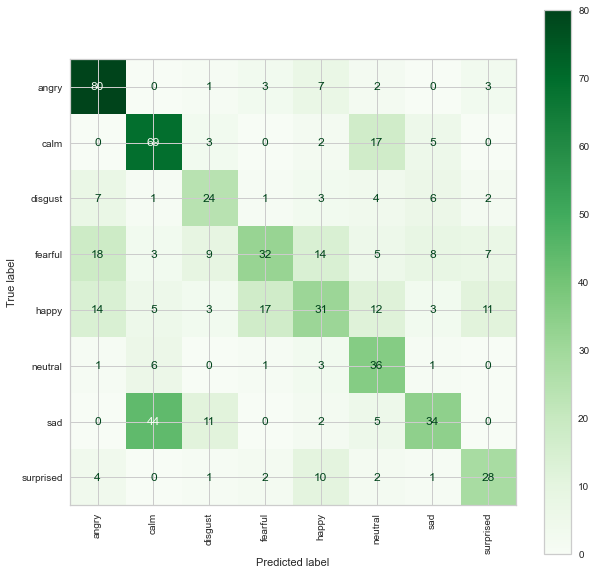

In [34]:
print_confMatrix(y_test,clf_2.predict(X_test_sel))

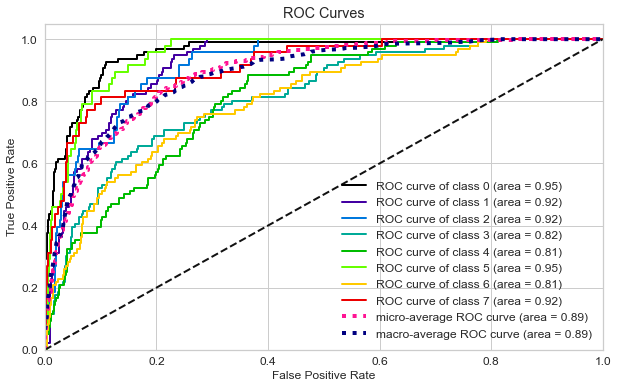

In [35]:
print_rocCurve(clf_2,X_test_sel,y_test)

In [37]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)


(624, 8)

In [39]:
from itertools import combinations

pair_list = list(combinations(np.unique(y_train ) , 2))
print(pair_list)
y_score =  clf_2.fit(X_train_sel, y_res).predict_proba(X_test_sel)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7), (5, 6), (5, 7), (6, 7)]


In [40]:
from sklearn.metrics import roc_auc_score

macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovo",
    average="macro",
)

print(f"Macro-averaged One-vs-OneROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-OneROC AUC score:
0.89


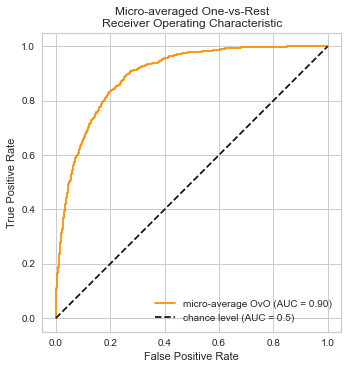

In [41]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvO",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()
